# Assignment 5 Due: Thursday 10/5

In this assignment you will explore fitting data and assessing how well your fit describes the different data sets.

Assignment Overview:
* Fit data and use $\chi^2$ and the $\chi^2$ test to assess 
* Analyze the efficiency of your data provided different threshold levels using your fit results 

For this assingment you can make use of the numpy, matplotlib, and the scipy packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.optimize import curve_fit
import scipy.special as sf

%matplotlib notebook

# Problem 1: W Boson Mass

Finding the *true* values of a quantity relies on analyzing results for many experiments. One quantity that has been measured many times is the W boson mass see Wikipedia https://en.wikipedia.org/wiki/W_and_Z_bosons and the particle data group (PDG) https://pdg.lbl.gov/2018/listings/rpp2018-list-w-boson.pdf 

**a)** In this problem you will analyze measurements of the W boson from various experiments and determine if the values are consistnet and given this data set, what the best fit value is. Start by reading in the data file Wmass_data.txt, which contains an experiment number, W mass in units of $GeV/c^2$ and its uncertainty.


In [6]:
N, w_mass, uncertainty = np.loadtxt('data/Wmass_data.txt', unpack=True)
print(N, w_mass, uncertainty)

[0. 1. 2. 3. 4. 5. 6. 7. 8.] [80.37  80.375 80.387 80.336 80.415 80.27  80.44  80.483 80.433] [0.018 0.023 0.019 0.067 0.052 0.055 0.051 0.084 0.079]


**b)** Compute the error weighted mean of the W mass and its uncertainty. How does the weighted mean compare to the bold faced average of the PDG?

In [7]:
weighted_mean = np.sum(w_mass / (uncertainty ** 2)) / np.sum(1 / (uncertainty ** 2))
print('Weighted mean:', weighted_mean)

weights = 1.0 / (uncertainty ** 2)

weighted_mean_uncertainty = np.sqrt(1.0 / np.sum(weights))

print('Weighted mean uncertainty:', weighted_mean_uncertainty)

Weighted mean: 80.37914612783634
Weighted mean uncertainty: 0.010338187803490969


The weighted mean is about 80.379 GeV/c^2, and according to the PDG, it also agrees that the value is 80.379 GeV/c^2. They are the same. 

**c)** Calculate the $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value. The p-value can be calculated using *gammaincc(dof / 2.0, chisq / 2.0)* from *scipy.special*. Based on the p-value are the data consistant?

In [8]:
#Chi^2
chisq = np.sum(((w_mass - weighted_mean) ** 2) / (uncertainty ** 2))
print('Chi squared:', chisq)

#DOF
dof = len(w_mass) - 1
print('Degrees of freedom:', dof)

#Reduced chi^2
reduced_chisq = chisq / dof
print('Reduced chi squared:',reduced_chisq)

#P-value
p_value = sf.gammaincc(dof / 2.0, chisq / 2.0)
print('P-value:',p_value)


Chi squared: 8.706836513332618
Degrees of freedom: 8
Reduced chi squared: 1.0883545641665773
P-value: 0.3676272331907402


Yes, according to the 0.368 p-value the data is fairly consistent. We can consider it consistent with the weighted mean despite being greater than the 0.05 significance level, since there is no indication that the general data siginificantly deviates from the weighted mean. 

**d)** Plot the measurement number vs. the W mass. Don't forget to include the error bars on the W mass measurements. Then Fit a line of the form $y = p_0$, where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

<IPython.core.display.Javascript object>


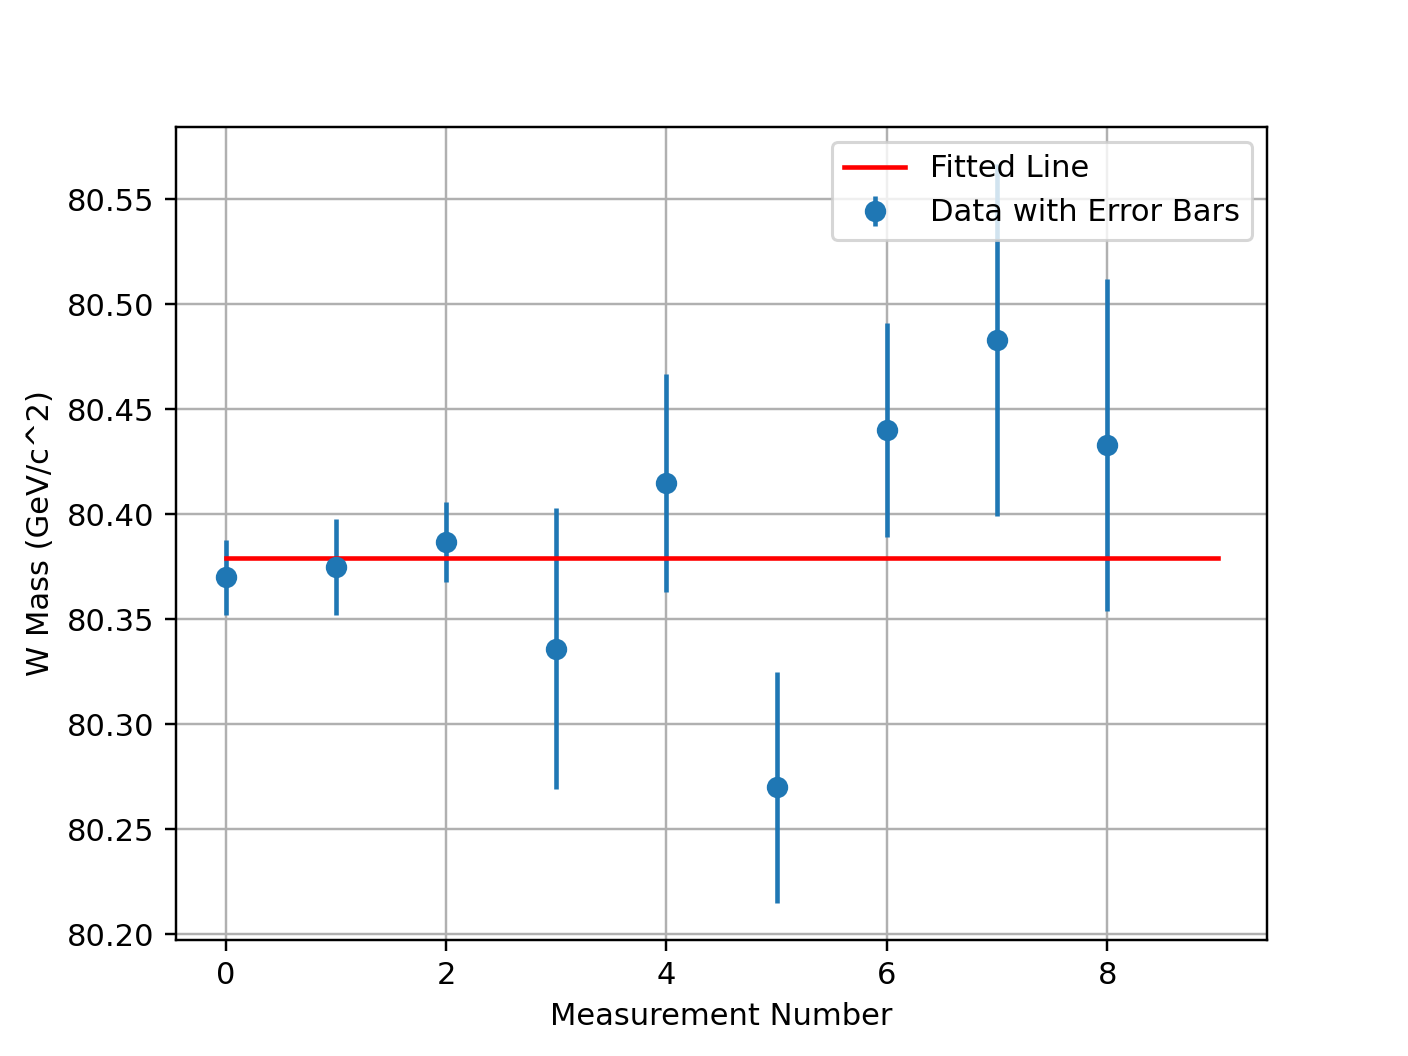

In [9]:
def constant_line(x, p0):
    return np.full_like(x, p0)

popt, covt = curve_fit(constant_line, N, w_mass, sigma=uncertainty)

p0_fit = popt[0]

x_fit = np.linspace(0, len(N), 100)

plt.errorbar(N, w_mass, yerr=uncertainty, fmt='o', label='Data with Error Bars')

plt.plot(x_fit, constant_line(x_fit, p0_fit), 'r-', label=f'Fitted Line')

plt.xlabel('Measurement Number')
plt.ylabel('W Mass (GeV/c^2)')
plt.legend()

plt.grid(True)
plt.show()

The p0 value is the same as the weighted mean I calculated earlier. 

# Problem 2: Proton Charge Radius

We will carry an identical analysis as we did in Problem 1, but on a different quantity, the proton charge radius. The proton charge radius has been a recent hot topic in the nuclear physics field, as new designed experiments using muonic hydorgen have made very percise measurements of it. See https://www.nature.com/articles/s41586-019-1721-2

There is an approchable video that reviews the history of the proton size and its measurements: https://www.youtube.com/watch?v=C5B_ZfGy4d0

**a)** Import the data set proton_radius_data.txt, which includes the experiment number, the proton charge radius, and its uncertainty measured in $fm$. 

In [13]:
p_N, p_radius, p_uncertainty = np.loadtxt('data/proton_radius_data.txt', unpack=True)

**b)** Compute the error weighted mean of the proton charge radius and its uncertainty. 

You can also compare this to the PDG value (pgs. 6 and 7): https://pdg.lbl.gov/2018/listings/rpp2018-list-p.pdf 

In [12]:
p_weighted_mean = np.sum(p_radius / (p_uncertainty ** 2)) / np.sum(1 / (p_uncertainty ** 2))
print('Weighted mean', p_weighted_mean)

p_weights = 1.0 / (p_uncertainty ** 2)

weighted_mean_uncertainty = np.sqrt(1.0 / np.sum(p_weights))

print('Weighted mean uncertainty:', weighted_mean_uncertainty)

Weighted mean 0.8416225242550588
Weighted mean uncertainty: 0.0003337320304863616


The PDG value is approximately 0.8751, and the value I obtained is about 0.8416. They are slightly different. 

**c)** Calculate the  $\chi^2$, degrees of freedom, reduced $\chi^2$ and p-value. Based on the p-value are the data consistant? Do you see what all of the fuss is about.

In [14]:
#Chi^2
p_chisq = np.sum(((p_radius - p_weighted_mean) ** 2) / (p_uncertainty ** 2))
print('Chi squared:', p_chisq)

#DOF
p_dof = len(p_radius) - 1
print('Degrees of freedom:', p_dof)

#Reduced chi^2
p_reduced_chisq = p_chisq / p_dof
print('Reduced chi squared:',p_reduced_chisq)

#P-value
p_p_value = sf.gammaincc(p_dof / 2.0, p_chisq / 2.0)
print('P-value:',p_p_value)


Chi squared: 222.8986182713527
Degrees of freedom: 14
Reduced chi squared: 15.921329876525192
P-value: 1.1145915261047136e-39


The p value is very very small, which suggests that the data is deviating from the expected behavior. Moreover, this data strongly contests the null hypothesis. This explains the fuss since it is hard to get consistent experimental results. 

**d)** Plot the measurement number vs. the proton charge radius. Don't forget to include the error bars on the proton charge radius measurements. Then Fit a line of the form  $y = p_0$ , where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

<IPython.core.display.Javascript object>


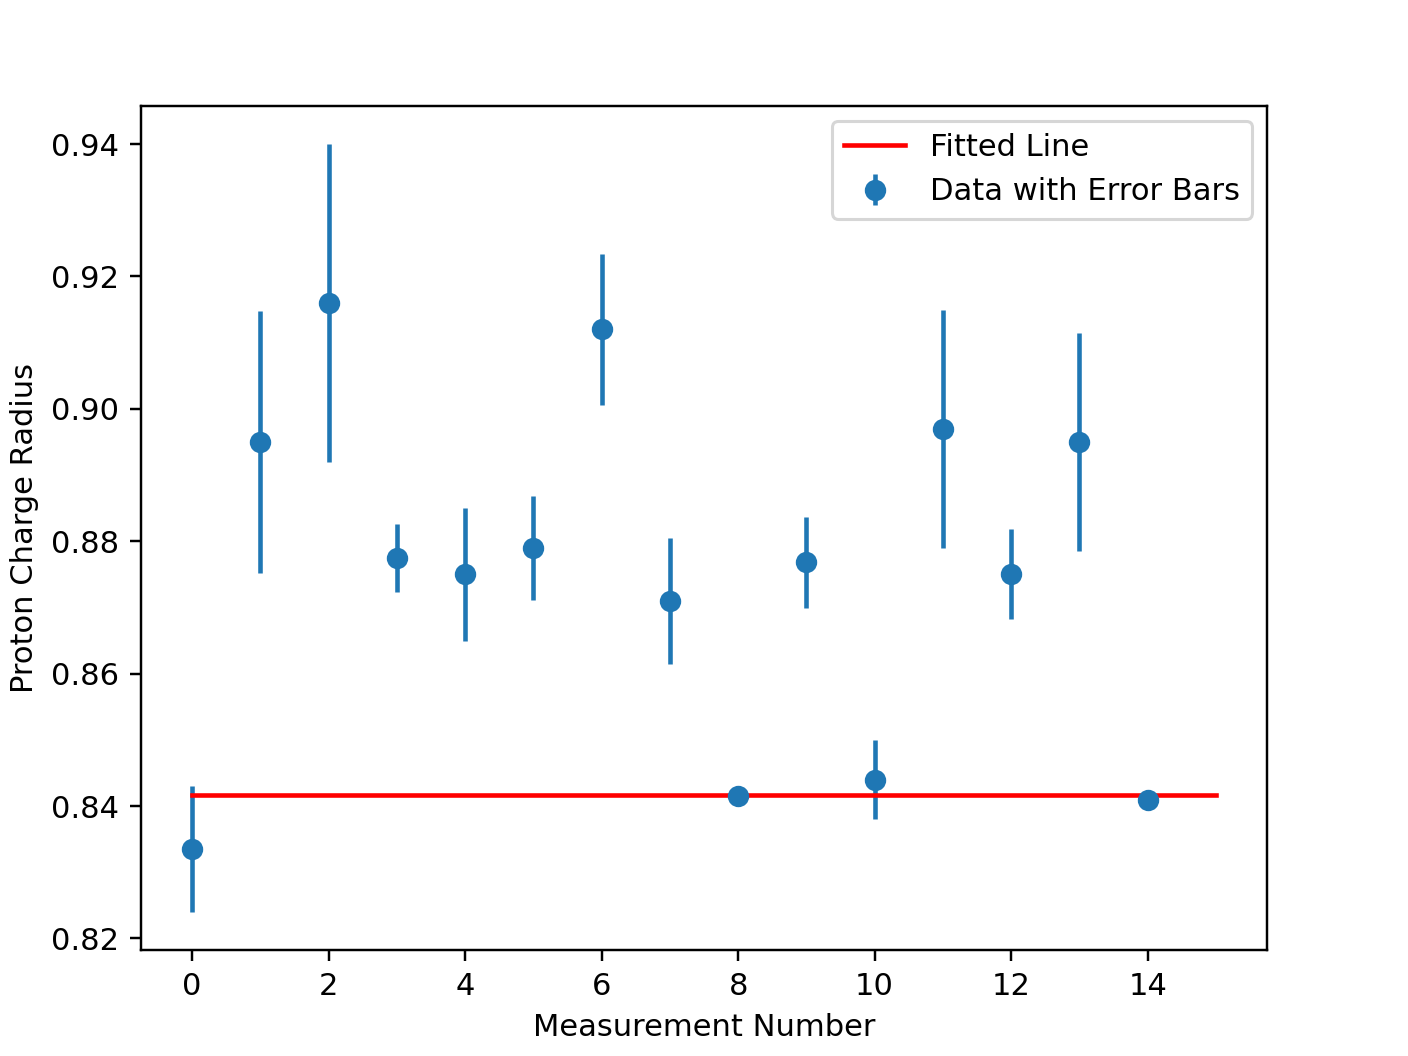

In [15]:
def p_constant_line(p_x, p_p0):
    return np.full_like(p_x, p_p0)

p_popt, p_covt = curve_fit(p_constant_line, p_N, p_radius, sigma=p_uncertainty)

p_p0_fit = p_popt[0]

p_x_fit = np.linspace(0, len(p_N), 100)

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.errorbar(p_N, p_radius, yerr=p_uncertainty, fmt='o', label='Data with Error Bars')

axes.plot(p_x_fit, p_constant_line(p_x_fit, p_p0_fit), 'r-', label=f'Fitted Line')

axes.set_xlabel('Measurement Number')
axes.set_ylabel('Proton Charge Radius')
axes.legend();

Again, the p0 value is the exact value of the uncertainty calculated above. 

# Problem 3: Selecting Data

In particle physics we sometimes want to measure a particlular particle that is created from many which result from a collision in a particle collider. In recording these collision events we typically measure other particles which are not the ones we are intersted in. The events we are interested in we refer to as our signal, whereas the ones we are not interested in we refer to as a background. 

**a)** The provided data set (Ep_data.txt) contains values of particle energy/momentum (E/p), the number of particles, and the uncertainty on the number of particles. Import the data and plot the number of particles vs. E/p and be sure to include the error bars on the particle counts. 

<IPython.core.display.Javascript object>


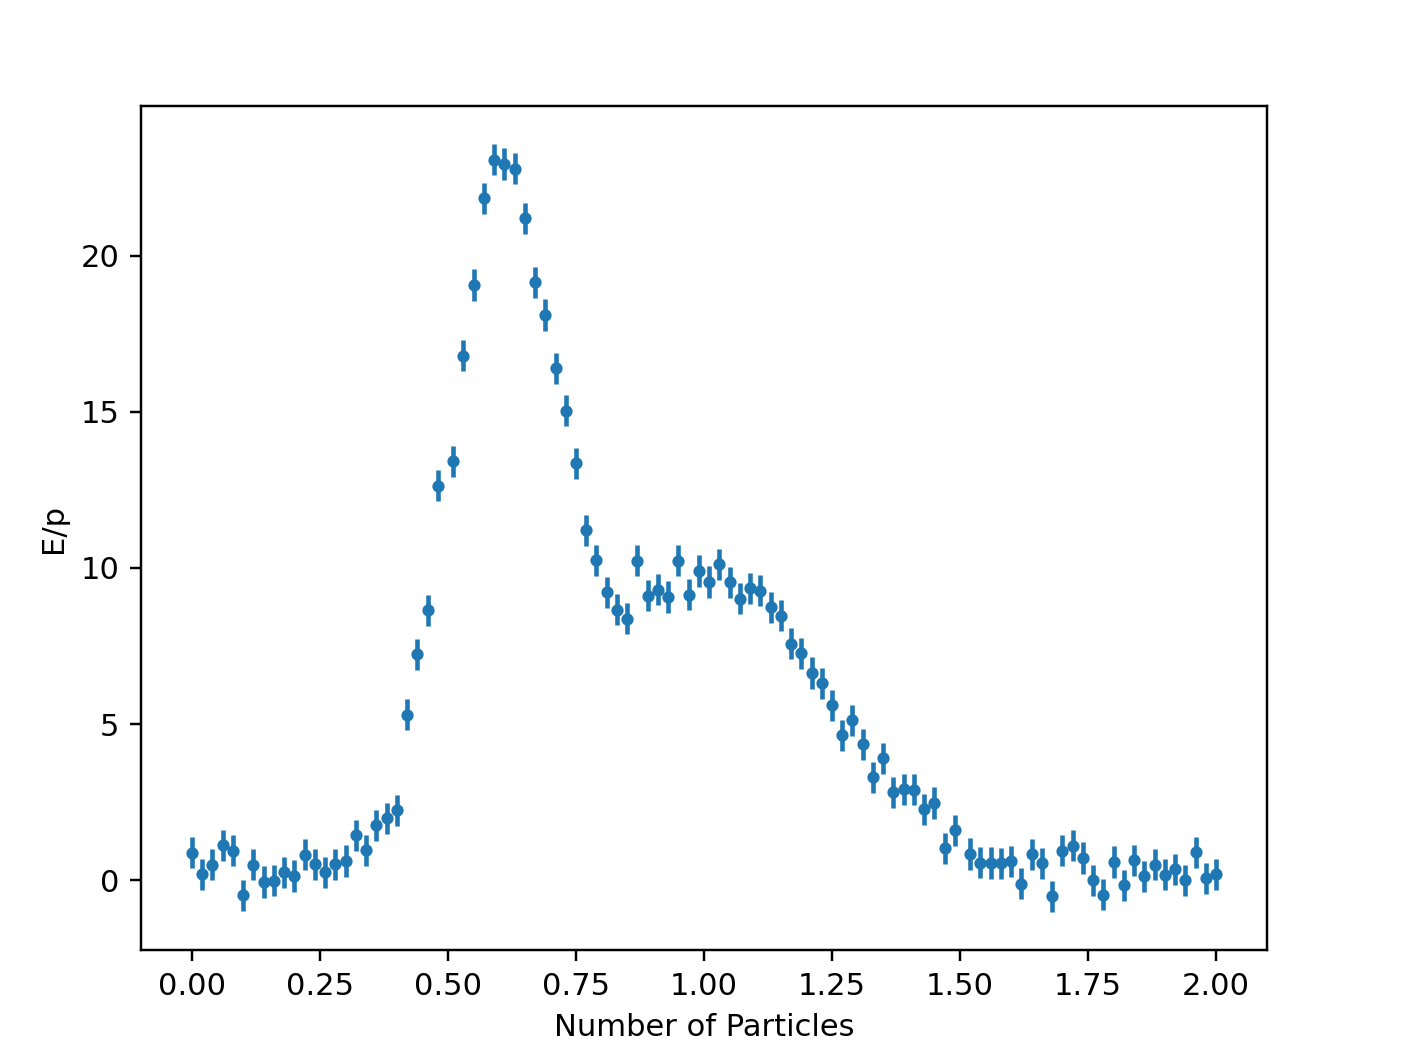

Text(0, 0.5, 'E/p')

In [16]:
energy_momentum, n_particles, particle_uncertainty = np.loadtxt('data/Ep_data.txt', unpack=True)


fig = plt.figure("collisions")
axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.errorbar(energy_momentum, n_particles, yerr=particle_uncertainty, fmt='o', markersize=3)


axes.set_xlabel('Number of Particles')
axes.set_ylabel('E/p')

**b)** You should notice that there appear to be two clear distributions here. One which seems to be centered E/p = 0.6 and another around E/p = 1. The population at the lower E/p represent pions, whereas the population around E/p = 1 are electrons. For this exersice we will treat the pions as a background and the electrons as our signal. We will model each particle type to have a Gaussian distribution. Define two python functions, one that returns a value computed from a Gaussian functions, and another python function that returns a value computed from the sum of two Gaussian functions. Then make a fit to the data using the sum of two Gaussian functions. Each of your Gaussian functions can take the form of:

$G_1(x) = p_1 e^{-(x-p_2)^2/(2p_3)}$

where the $p_1, p_2,$ and $p_3$ are three parameters for the one Gaussian function. You will have 3 more different parameters for the other Gaussian function $G_2(x)$. So we want to fit our E/p distribution with function $G_1(x) + G_2(x)$. The image below shows my fit, with the $G_1(x) + G_2(x)$ fit being the black curve. From this fit I can use the fit parameters to draw $G_1(x)$ (blue curve) and $G_2(x)$ (red curve). 

Note: Did you get a negative value for the gaussian widths from your fit? We know that a negative value is not physical. Try to give some initial parameters for the fit to start with.

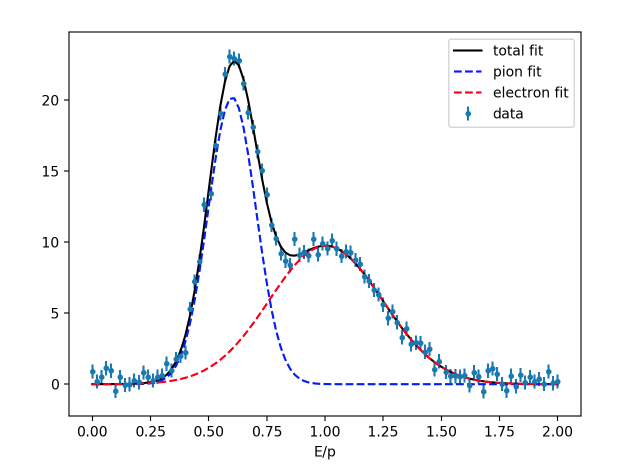

<IPython.core.display.Javascript object>


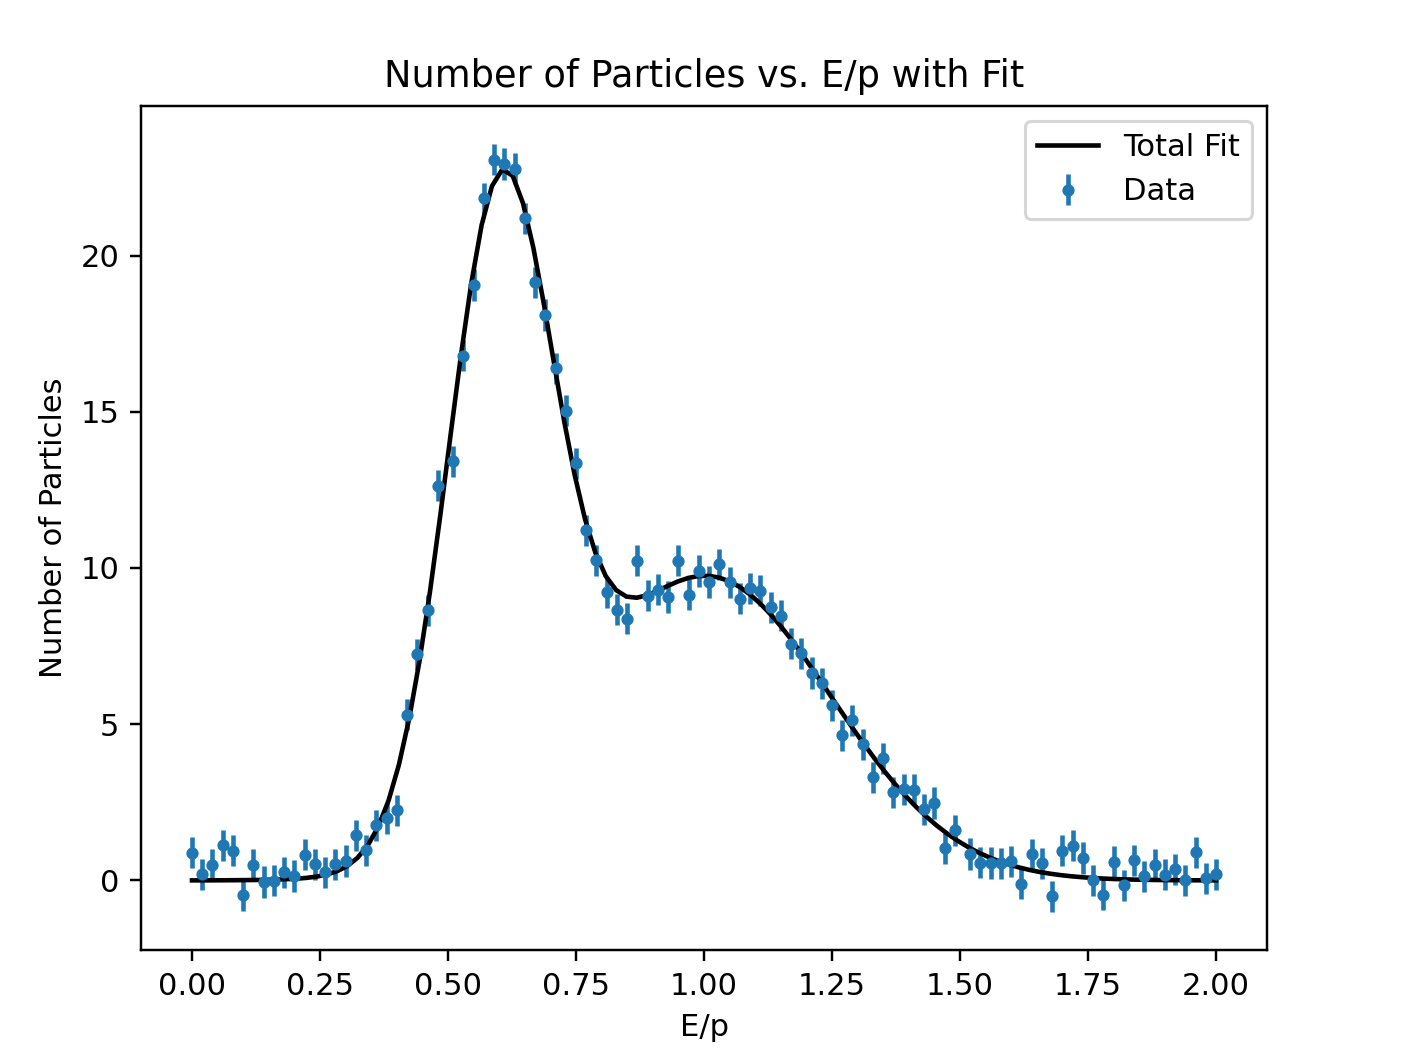

In [17]:
def gaussian1(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def gaussian2(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return gaussian1(x, A1, mu1, sigma1) + gaussian1(x, A2, mu2, sigma2)

initial_params = [1000, 0.6, 0.1, 1000, 1.0, 0.1] 
params, params_covariance = curve_fit(gaussian2, energy_momentum, n_particles, p0=initial_params)

A1, mu1, sigma1, A2, mu2, sigma2 = params

fig = plt.figure("gaussians")
axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.errorbar(energy_momentum, n_particles, yerr=particle_uncertainty, fmt='o', markersize=3, label='Data')

x_fit = np.linspace(min(energy_momentum), max(energy_momentum), 100)
axes.plot(x_fit, gaussian2(x_fit, *params), 'k-', label='Total Fit')

axes.set_xlabel('E/p')
axes.set_ylabel('Number of Particles')
axes.set_title('Number of Particles vs. E/p with Fit')
axes.legend()




**c)** Calculate your $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value for the fit to the data.
Based on those statistics above is this a good fit? Explain.

In [18]:
fit_curve = gaussian2(x_fit, *params)

residuals = n_particles - fit_curve

chi_squared = np.sum((residuals / particle_uncertainty)**2)

dof2 = len(energy_momentum) - len(params)

reduced_chi_squared = chi_squared / dof2

p_value = 1 - sf.gammaincc(dof2 / 2.0, chi_squared / 2.0)

print("Chi-squared:", chi_squared)
print("Degrees of Freedom:", dof2)
print("Reduced Chi-squared:", reduced_chi_squared)
print("P-value:", p_value)

Chi-squared: 101.57064983828596
Degrees of Freedom: 94
Reduced Chi-squared: 1.080538828066872
P-value: 0.7211669207418034


Based on the statistics, this is a good fit. The reduced chi squared value is a good indicator. If this value is close to 1, which 1.081 is, we know that the fit is very good. Also, the p value is a suitable number that is not insanely small.

**d)** On the same graph, plot your data, the total fit to it, and the single Gaussian functions computed using the parameter results from your 2 Gaussian function fit (e.g. reproduce my fit figure). 

<IPython.core.display.Javascript object>


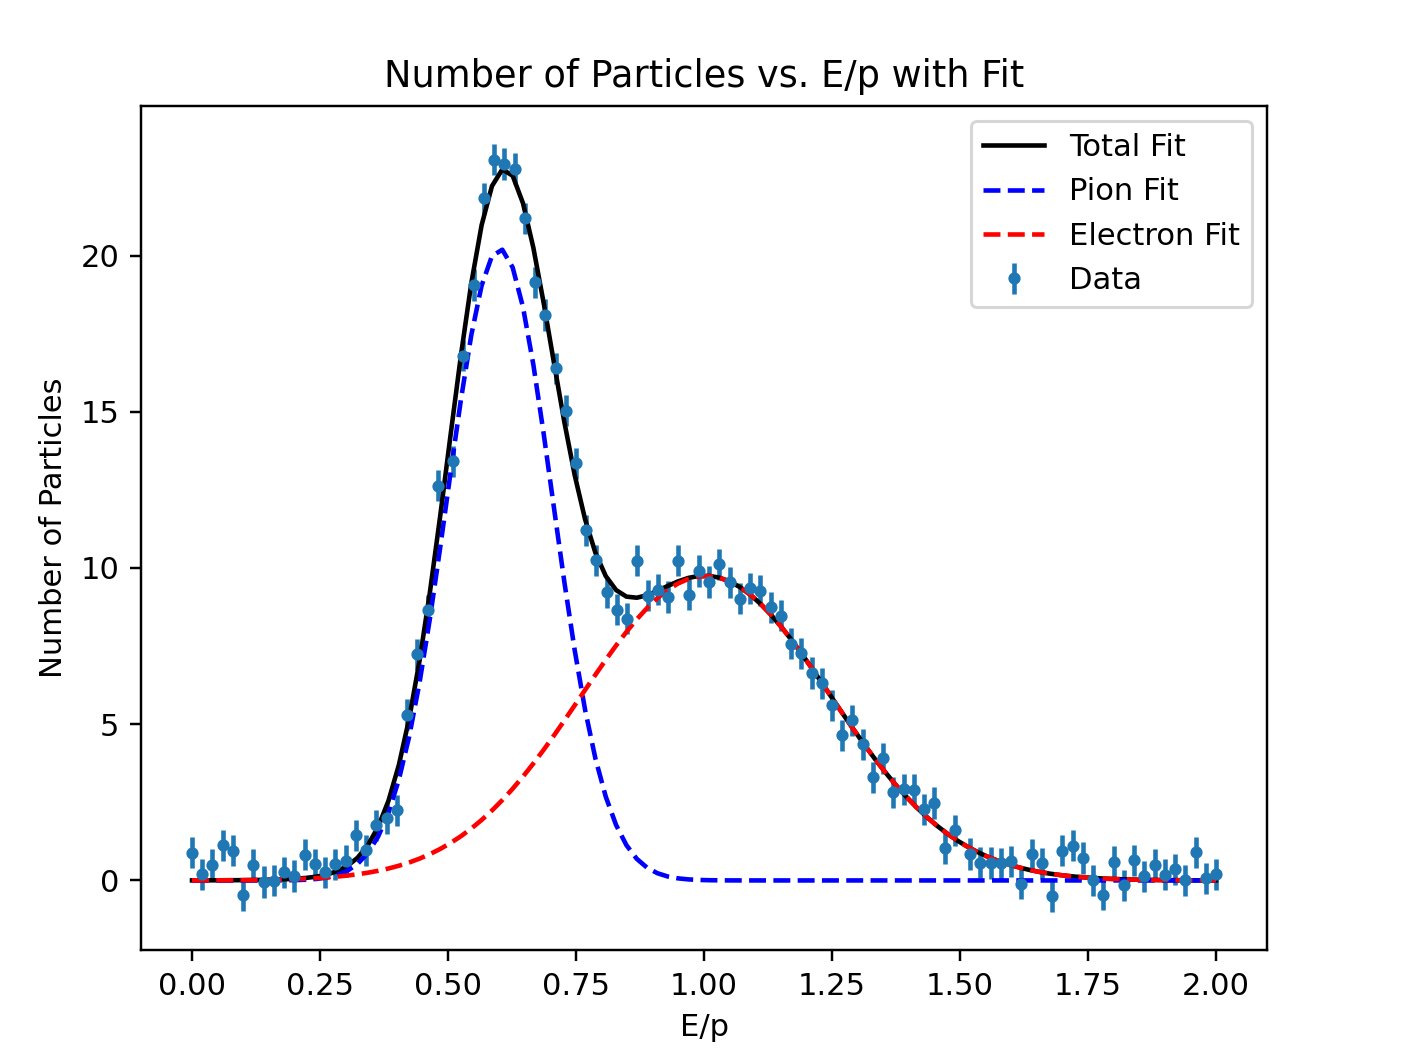

In [19]:
fig = plt.figure("all together")
axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.errorbar(energy_momentum, n_particles, yerr=particle_uncertainty, fmt='o', markersize=3, label='Data')

x_fit = np.linspace(min(energy_momentum), max(energy_momentum), 100)
axes.plot(x_fit, gaussian2(x_fit, *params), 'k-', label='Total Fit')
axes.plot(x_fit, gaussian1(x_fit, A1, mu1, sigma1), 'b--', label='Pion Fit')
axes.plot(x_fit, gaussian1(x_fit, A2, mu2, sigma2), 'r--', label='Electron Fit')


axes.set_xlabel('E/p')
axes.set_ylabel('Number of Particles')
axes.set_title('Number of Particles vs. E/p with Fit')
axes.legend()

**e)** We can use the $E/p$ distribution to try to select the maximum number of electrons while minimizing the number of pions that *leak* into our electron signal. We can do this by requireing our selected sample to be larger than some $E/p$ threshold value. Any data that has an $E/p$ value lower then the threshold we throw it out. In a physics analysis this is called a cut. However we need to be careful, if we place a cut at $E/p$ that is too large we will have a really clean electron sample, but throw away a lot of good electrons. On the other hand if we make the $E/p$ cut too low we will keep most of our electrons, but let in a lot of background (pions). So we must compormise between clean data and statistics. To do this lets calculat the total number of electrons we have from $0.0 < E/p < 2$. This can be obtained by integrating (you can use scipy integrators, I used *integrate.quad* when doing this exersise)the electron contribution from our fit. We will call this number e_tot. Do a similar thing for the total pions and call that number pi_tot. 

For 10 equally spaced E/p thresholds between 0.3 and 0.8, calculate the number of electrons that are above each of the thresholds, we can call this array e_sig and can be obtained by integrating from the E/p threshold value to the E/p = 2. Do a similar thing for the pion distribution. 

Below is the your graph in part f) should look like.

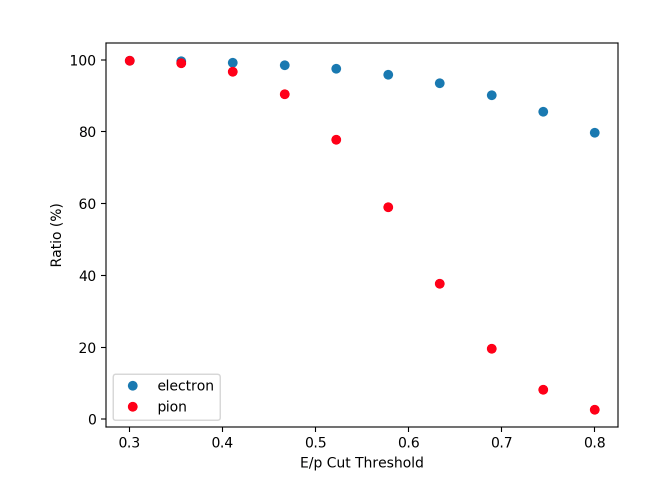



In [20]:
from scipy.integrate import quad

def electron_gaussian(x, A1, mu1, sigma1):
    return gaussian1(x, A1, mu1, sigma1)

def pion_gaussian(x, A2, mu2, sigma2):
    return gaussian1(x, A2, mu2, sigma2)

integration_limits = (0.0, 2.0)

e_tot, _ = quad(electron_gaussian, *integration_limits, args=(A1, mu1, sigma1))
pi_tot, _ = quad(pion_gaussian, *integration_limits, args=(A2, mu2, sigma2))

print('Electron total:', e_tot)
print('Pion total:', pi_tot)

Electron total: 5.214506705402482
Pion total: 5.949294541874173


**f)** Plot the ratios e_sig/e_tot and pi_sig/pi_tot as a function of E/p threshold on the same graph. 

<IPython.core.display.Javascript object>


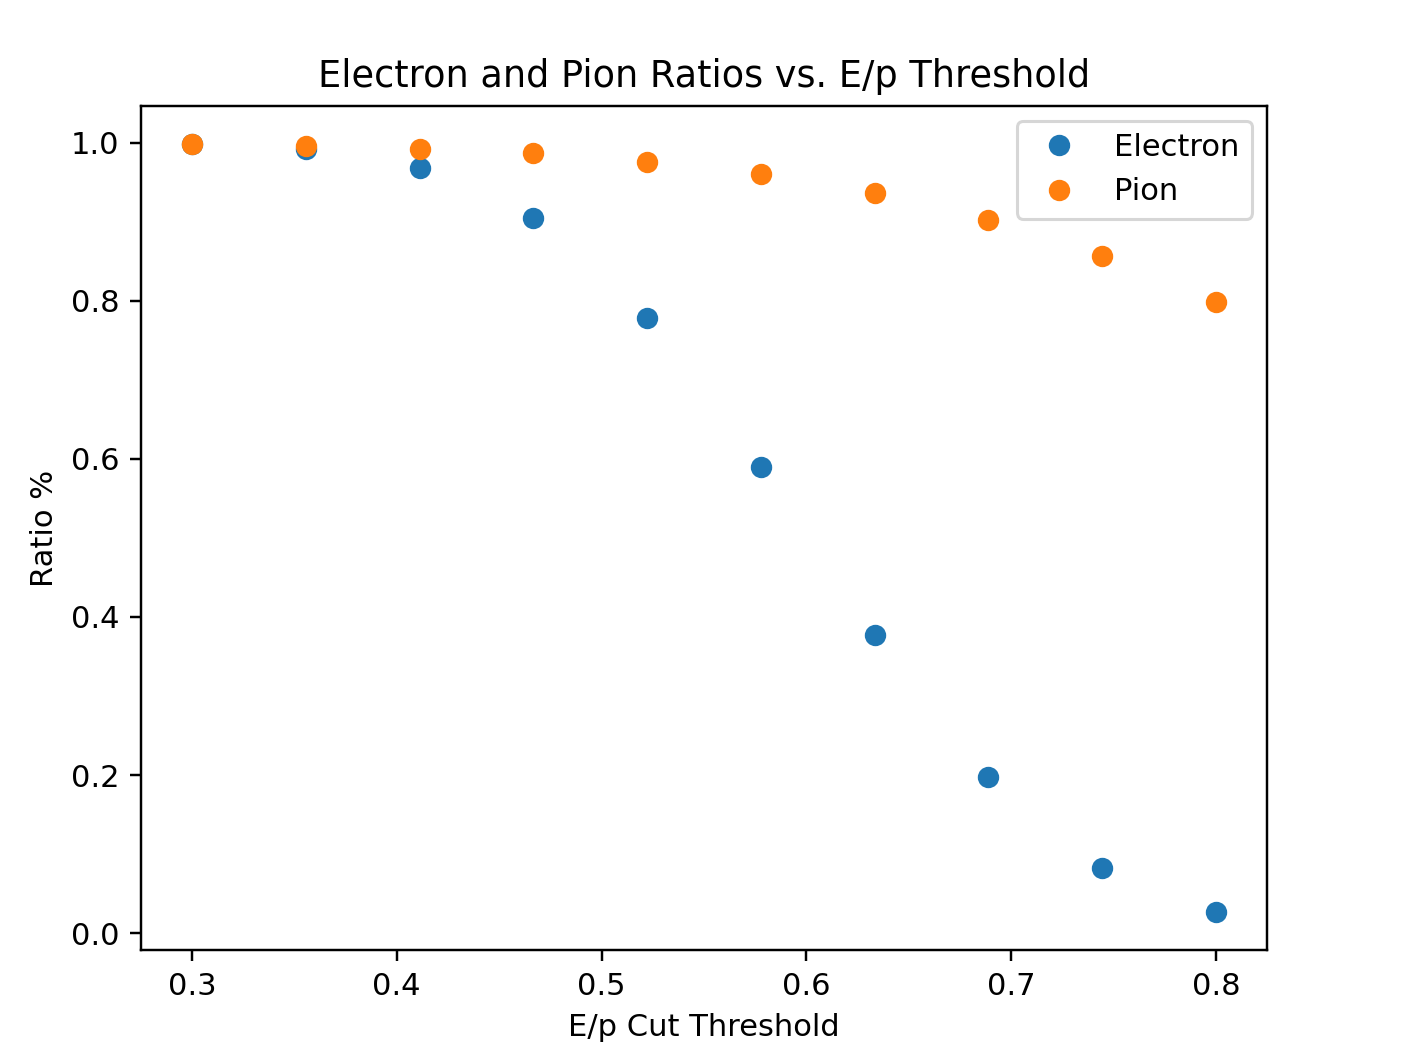

In [21]:
thresholds = np.linspace(0.3, 0.8, 10)

e_ratios = np.zeros(len(thresholds))
pi_ratios = np.zeros(len(thresholds))

for i, threshold in enumerate(thresholds):
    e_above_threshold, _ = quad(electron_gaussian, threshold, 2.0, args=(A1, mu1, sigma1))
    pi_above_threshold, _ = quad(pion_gaussian, threshold, 2.0, args=(A2, mu2, sigma2))
    e_ratios[i] = e_above_threshold / e_tot
    pi_ratios[i] = pi_above_threshold / pi_tot


fig = plt.figure("Number of Particles vs. E/p with Fit")
axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(thresholds, e_ratios, label='Electron', marker='o', linestyle='None')
axes.plot(thresholds, pi_ratios, label='Pion', marker='o', linestyle='None')


axes.set_xlabel('E/p Cut Threshold')
axes.set_ylabel('Ratio %')
axes.set_title('Electron and Pion Ratios vs. E/p Threshold')
axes.legend()

**g)** When the e_sig/etot ratio is 90%, how what percentage of the pion distribution is contaminating our electron sample?

In [22]:
threshold_90 = thresholds[np.argmin(np.abs(e_ratios - 0.9))]
pi_ratio_90 = pi_ratios[np.argmin(np.abs(thresholds - threshold_90))]

pion_contam = (1 - pi_ratio_90) * 100

print('Pion contamination:', pion_contam,"%")





Pion contamination: 1.3724024749168895 %
